In [1]:
# the import files
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from keras_preprocessing.image import image_data_generator
#get data sets
# Get project files
!wget https://raw.githubusercontent.com/saswat711/Machine-Learning-Project/main/Square%20and%20Circle%20Classifier/dataset.zip

!unzip dataset.zip
PATH = ''

train_dir = os.path.join(PATH, 'toy_train')
validation_dir = os.path.join(PATH, 'toy_val')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])

# Variables for pre-processing and training.
batch_size = 32
epochs = 4
IMG_HEIGHT = 150
IMG_WIDTH = 150


#having the image generator
train_image_generator = ImageDataGenerator(
  rescale=1./255,
  dtype=tf.float32)

validation_image_generator =ImageDataGenerator(
  rescale=1./255,
  dtype=tf.float32)

test_image_generator = ImageDataGenerator(
    rescale = 1./255,
    dtype = tf.float32)

# CREATE THE DATA
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
    seed=42
)



--2022-08-06 16:20:12--  https://raw.githubusercontent.com/saswat711/Machine-Learning-Project/main/Square%20and%20Circle%20Classifier/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1570074 (1.5M) [application/zip]
Saving to: ‘dataset.zip.1’

dataset.zip.1       100%[===================>]   1.50M  --.-KB/s    in 0.04s   

2022-08-06 16:20:12 (38.9 MB/s) - ‘dataset.zip.1’ saved [1570074/1570074]

Archive:  dataset.zip
   creating: toy_train/
   creating: toy_train/circle/
  inflating: toy_train/circle/101.jpg  
  inflating: toy_train/circle/102.jpg  
  inflating: toy_train/circle/103.jpg  
  inflating: toy_train/circle/104.jpg  
  inflating: toy_train/circle/105.jpg  
  inflating: toy_train/circle/110.jpg  
  inflating: toy_train/circle/112.jpg  


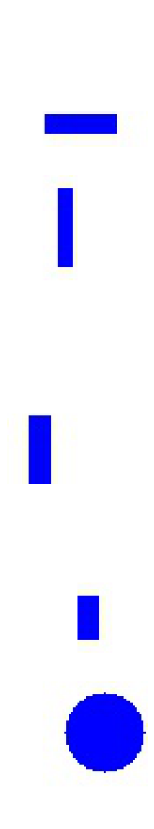

Found 1000 images belonging to 2 classes.


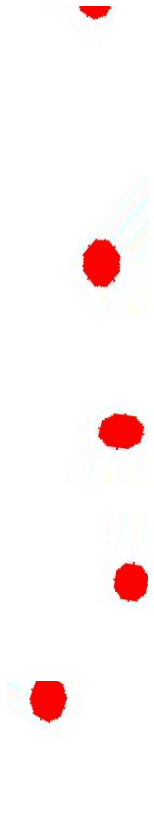

In [7]:
#plot images
#plot images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% circle")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% rectangle")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


train_image_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip='nearest', 
    dtype=tf.float32)


# to plot train images with transformation
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# creating the model
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

print("Before compiling summary")
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("After compiling summary")
model.summary()

Before compiling summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                               

In [9]:
# to save in checkpoint the model
checkpoint = ModelCheckpoint( filepath='./', monitor='val_acc', verbose=1, save_best_only=True,
                              mode='auto', save_freq='epoch')
history = model.fit(train_data_gen, steps_per_epoch=len(train_data_gen), epochs=epochs, validation_data=val_data_gen, validation_steps= len(val_data_gen), callbacks=[checkpoint])

Epoch 1/4
32/32 [==============================] - 23s 279ms/step - loss: 0.6328 - accuracy: 0.7330 - val_loss: 1.7247 - val_accuracy: 0.4900
Epoch 2/4
32/32 [==============================] - 6s 194ms/step - loss: 0.4951 - accuracy: 0.7810 - val_loss: 1.1907 - val_accuracy: 0.5150
Epoch 3/4
32/32 [==============================] - 7s 216ms/step - loss: 0.3397 - accuracy: 0.8590 - val_loss: 3.0486 - val_accuracy: 0.4900
Epoch 4/4
32/32 [==============================] - 6s 189ms/step - loss: 0.1237 - accuracy: 0.9570 - val_loss: 4.7584 - val_accuracy: 0.5000


INFO:tensorflow:Assets written to: SQUARE_MODEL/assets


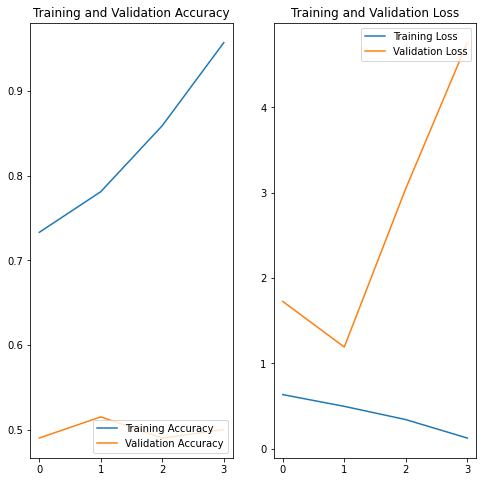

In [10]:
# TO SAVE THE MODEL
model.save('SQUARE_MODEL')

# to plot the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc,label='Training Accuracy')

plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')

plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
from google.colab import files
import cv2

# TO LOAD TEH MODEL
model = load_model('SQUARE_MODEL')

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#FUNCTION TO MAKE A PREDICTION USING MODEL
def pred_func():
  #to make preditction
  img_url  =  input("Enter the image url: ")
  !wget -O test_img "$img_url"
  img_path = "test_img"
  img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x/=255.
  images = np.vstack([x])
  prediction = model.predict(images, batch_size=10)
  val = prediction[0][0]
  if(round(val)<=0.5):
        print("rectangle")
  else:
        print("circle")


pred_func()

Enter the image url: https://cdn-skill.splashmath.com/panel-uploads/GlossaryTerm/da5a861feb0e4bee9ca440a8751bca03/1547802408_square-shape.png
--2022-08-06 16:52:55--  https://cdn-skill.splashmath.com/panel-uploads/GlossaryTerm/da5a861feb0e4bee9ca440a8751bca03/1547802408_square-shape.png
Resolving cdn-skill.splashmath.com (cdn-skill.splashmath.com)... 104.18.18.7, 104.18.19.7, 2606:4700::6812:1307, ...
Connecting to cdn-skill.splashmath.com (cdn-skill.splashmath.com)|104.18.18.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275 [image/png]
Saving to: ‘test_img’

test_img            100%[===================>]     275  --.-KB/s    in 0s      

2022-08-06 16:52:55 (68.6 MB/s) - ‘test_img’ saved [275/275]

rectangle
